In [ ]:
!pip install nltk gensim pyLDAvis


In [ ]:

import pandas as pd



# Read the CSV file
file_path = '/content/nfl_news_articles_partial.csv'
df = pd.read_csv(file_path)
df.head()


,Link,Article
0,https://www.nfl.com/news/lions-signing-one-tim...,Around the NFL\n \n\n\n\n\n\n\n\n...
1,https://www.nfl.com/news/move-the-sticks-takea...,"Move the Sticks: Takeaways from 49ers, Eagles,..."
2,https://www.nfl.com/news/cowboys-cut-kicker-tr...,Around the NFL\n \n\n\n\n\n\n\n\n...
3,https://www.nfl.com/news/inside-training-camp-...,Around the NFL\n \n\n\n\n\n\n\n\n...
4,https://www.nfl.com/news/2023-nfl-training-cam...,The Debrief\n \n\n\n\n\n\n\n\n\n\...


In [ ]:
df.dropna()

,Link,Article
0,https://www.nfl.com/news/lions-signing-one-tim...,Around the NFL\n \n\n\n\n\n\n\n\n...
1,https://www.nfl.com/news/move-the-sticks-takea...,"Move the Sticks: Takeaways from 49ers, Eagles,..."
2,https://www.nfl.com/news/cowboys-cut-kicker-tr...,Around the NFL\n \n\n\n\n\n\n\n\n...
3,https://www.nfl.com/news/inside-training-camp-...,Around the NFL\n \n\n\n\n\n\n\n\n...
4,https://www.nfl.com/news/2023-nfl-training-cam...,The Debrief\n \n\n\n\n\n\n\n\n\n\...
...,...,...
7463,https://www.nfl.com/news/court-ruling-clears-p...,Court ruling clears path for sale of Denver Br...
7464,https://www.nfl.com/news/giants-fire-head-coac...,Around the NFL\n \n\n\n\n\n\n\n\n...
7465,https://www.nfl.com/news/total-access-the-lock...,Total Access The Locker Room Podcast: Super Wi...
7466,https://www.nfl.com/news/weighing-fifth-year-o...,Analysis\n \n\n\n\n\n\n\n\n\n\n ...


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Assuming 'df' is your pandas DataFrame with 'Article' column

# Function to preprocess text data
def preprocess_text(text):
    if isinstance(text, str):
        # Convert text to lowercase
        text = text.lower()

        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

        # Remove digits
        text = re.sub(r'\d+', '', text)

        # Remove common words and phrases
        common_words = ['nfl', 'around the nfl']  # Add more words/phrases as needed
        for word in common_words:
            text = text.replace(word, '')

        # Remove special characters and symbols
        text = re.sub(r'[^\w\s]', '', text)

        # Tokenize the text into words
        tokens = word_tokenize(text)

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]

        # Lemmatize words
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]

        # Remove frequent words (if needed)
        # Replace '50' with the desired threshold of word frequency
        frequency_threshold = 50
        word_frequency = nltk.FreqDist(tokens)
        tokens = [token for token in tokens if word_frequency[token] <= frequency_threshold]

        return tokens
    else:
        return []

# Apply preprocessing to the 'Text' column, handle missing values
df['Processed_Text'] = df['Article'].apply(preprocess_text)

# Create a dictionary from the processed text
dictionary = Dictionary(df['Processed_Text'])

# Create a bag-of-words corpus
corpus = [dictionary.doc2bow(text) for text in df['Processed_Text']]

# Train the LDA model
num_topics = 5  # Set the number of topics
lda_model = LdaModel(corpus, id2word=dictionary, num_topics=num_topics, passes=10)

# Visualize the LDA topics
vis_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis_data)

# Get the topic distribution for each document
topic_distribution = [lda_model.get_document_topics(doc) for doc in corpus]

# Extract the most probable topic for each document
df['Dominant_Topic'] = [max(topics, key=lambda x: x[1])[0] if topics else None for topics in topic_distribution]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Visualize the LDA topics
vis_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis_data)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Extract the most probable topic for each document
df['Dominant_Topic'] = [max(topics, key=lambda x: x[1])[0] for topics in topic_distribution]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


This Python code utilizes the "wordcloud" and "matplotlib" libraries to generate a visual representation of the most significant words extracted from various topics using Latent Dirichlet Allocation (LDA) modeling. By extracting the top words for each topic and creating a word cloud from the concatenated list of these words, the script creates an easily interpretable graphical summary of the prominent terms associated with the topics, aiding in understanding the main themes present in the analyzed text data.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:508:

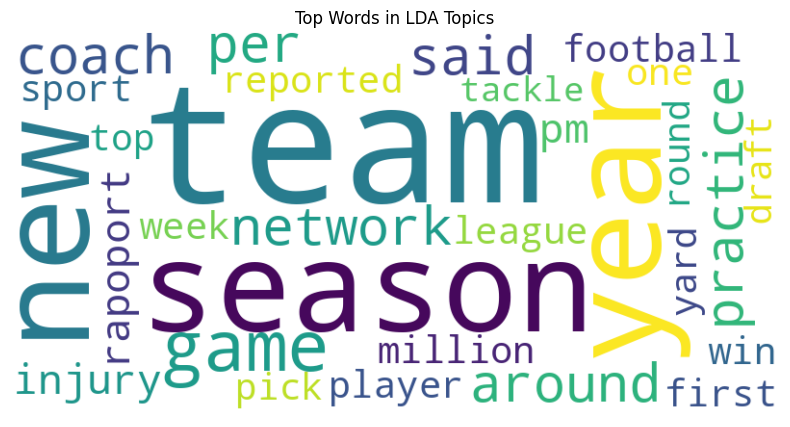

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get the top N words for each topic
num_words_per_topic = 8
top_words_per_topic = []
for topic_id in range(num_topics):
    top_words = lda_model.show_topic(topic_id, topn=num_words_per_topic)
    topic_words = [word for word, prob in top_words]
    top_words_per_topic.append(topic_words)

# Concatenate the top words from all topics into a single list
all_top_words = [word for topic_words in top_words_per_topic for word in topic_words]

# Join all top words into a single string
top_words_text = ' '.join(all_top_words)

# Create and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(top_words_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Words in LDA Topics')
plt.show()


employs the "seaborn" library alongside "matplotlib" to visualize the distribution of documents across different topics in a dataset. It first calculates the count of documents associated with each dominant topic and stores this information in the topic_counts variable. Then, a bar plot is generated using Seaborn's barplot() function, where the x-axis represents topic IDs, the y-axis represents the corresponding number of documents for each topic, and the plot is enhanced with labels and a title. This visualization effectively showcases the distribution of documents among various topics, enabling a quick insight into the prominence of each topic within the dataset.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


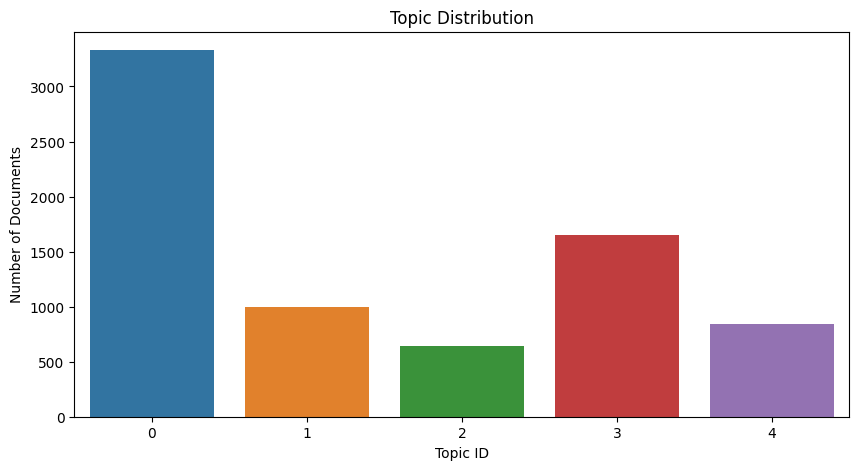

In [ ]:


import seaborn as sns

# Count the number of documents per topic
topic_counts = df['Dominant_Topic'].value_counts()

# Plot the topic distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=topic_counts.index, y=topic_counts.values)
plt.xlabel('Topic ID')
plt.ylabel('Number of Documents')
plt.title('Topic Distribution')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


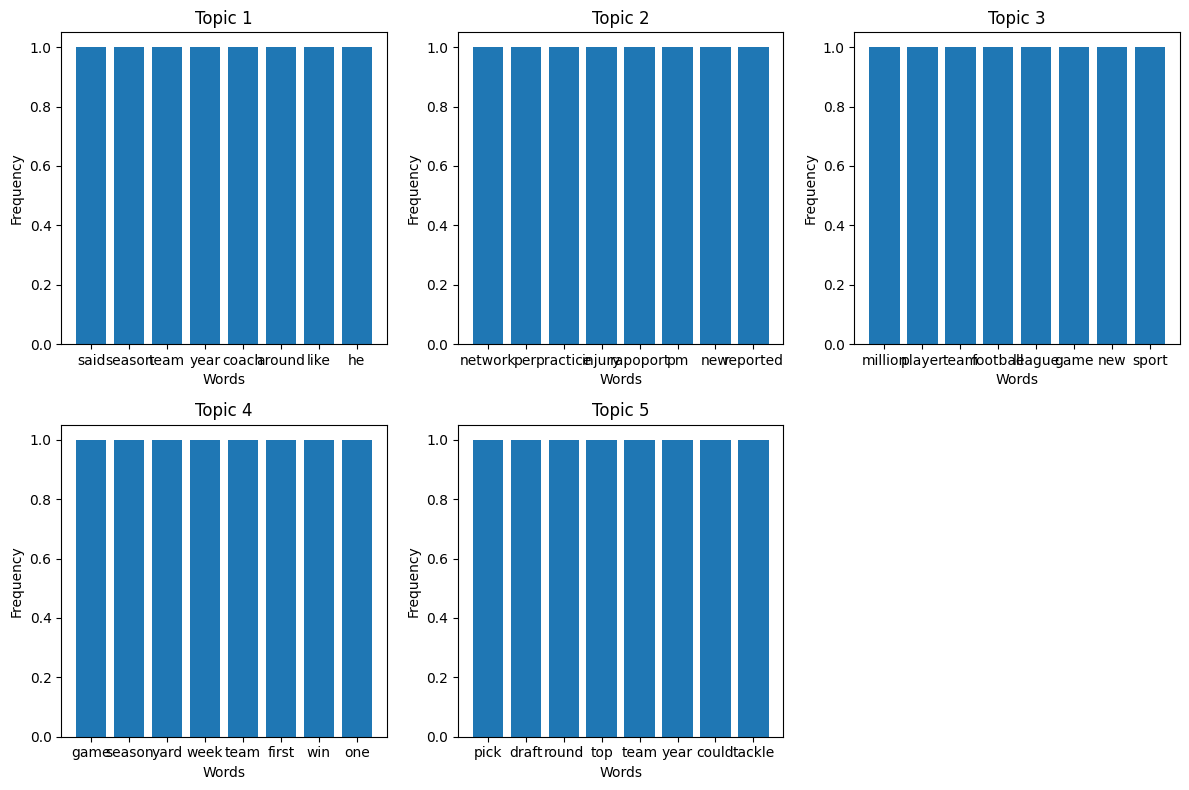

In [ ]:
from collections import Counter

# Count word frequencies for each topic
word_frequencies_per_topic = [Counter(topic_words) for topic_words in top_words_per_topic]

# Plot the word frequencies for each topic
plt.figure(figsize=(12, 8))
for i, topic_words in enumerate(top_words_per_topic):
    plt.subplot(2, 3, i+1)
    word_frequencies = word_frequencies_per_topic[i]
    plt.bar(word_frequencies.keys(), word_frequencies.values())
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f'Topic {i+1}')
plt.tight_layout()
plt.show()

The outcome is a grid of bar plots, where each subplot represents the word frequencies for a different topic's top words. This visualization provides insight into the most frequent words for each topic, aiding in understanding the key terms associated with the topics extracted through the topic modeling process.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


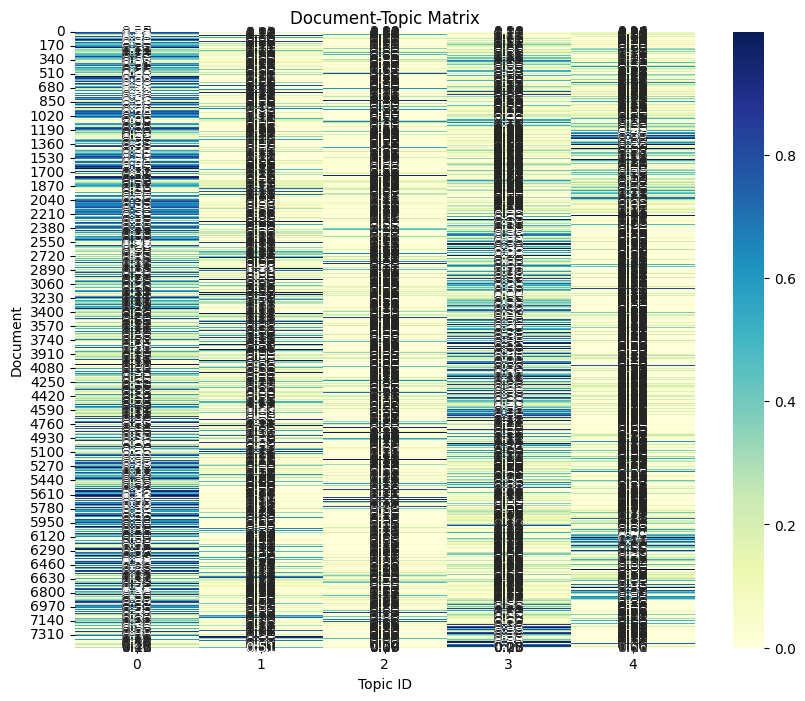

In [ ]:
import numpy as np

# Create a document-topic matrix
doc_topic_matrix = np.zeros((len(corpus), num_topics))
for i, doc in enumerate(corpus):
    for topic_id, prob in lda_model[doc]:
        doc_topic_matrix[i, topic_id] = prob

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(doc_topic_matrix, cmap='YlGnBu', annot=True, fmt='.2f')
plt.xlabel('Topic ID')
plt.ylabel('Document')
plt.title('Document-Topic Matrix')
plt.show()


In [ ]:
import pandas as pd

# Get the top N words with scores for each topic
num_words_per_topic = 10
top_words_with_scores_per_topic = []
for topic_id in range(num_topics):
    top_words = lda_model.show_topic(topic_id, topn=num_words_per_topic)
    top_words_with_scores = [(word, score) for word, score in top_words]
    top_words_with_scores_per_topic.append(top_words_with_scores)

# Create a DataFrame to display the top words with scores for each topic
df_top_words = pd.DataFrame(top_words_with_scores_per_topic, columns=[f'Top_{i+1}_Word' for i in range(num_words_per_topic)])

# Display the DataFrame
print(df_top_words)


#The output is a tabular representation of the top words along with their scores for each topic, providing a more structured and readable
#way to examine the results of the topic modeling process

                Top_1_Word              Top_2_Word               Top_3_Word  \
0      (said, 0.011220563)   (season, 0.009314915)      (team, 0.008422304)   
1  (network, 0.0095950635)      (per, 0.009119898)  (practice, 0.008547899)   
2   (million, 0.008497243)  (player, 0.0068548126)      (team, 0.006831795)   
3      (game, 0.015193626)   (season, 0.012997796)      (yard, 0.011949943)   
4      (pick, 0.015378347)     (draft, 0.01250595)    (round, 0.0064066527)   

                 Top_4_Word               Top_5_Word             Top_6_Word  \
0       (year, 0.008217482)     (coach, 0.007038934)  (around, 0.006618774)   
1     (injury, 0.008241391)  (rapoport, 0.008241307)      (pm, 0.007833781)   
2  (football, 0.0062266774)    (league, 0.005617675)    (game, 0.004806184)   
3       (week, 0.009767387)     (team, 0.0068760165)  (first, 0.0061307955)   
4       (top, 0.0057155685)     (team, 0.0051551997)   (year, 0.0050771018)   

             Top_7_Word               Top_8_Word  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


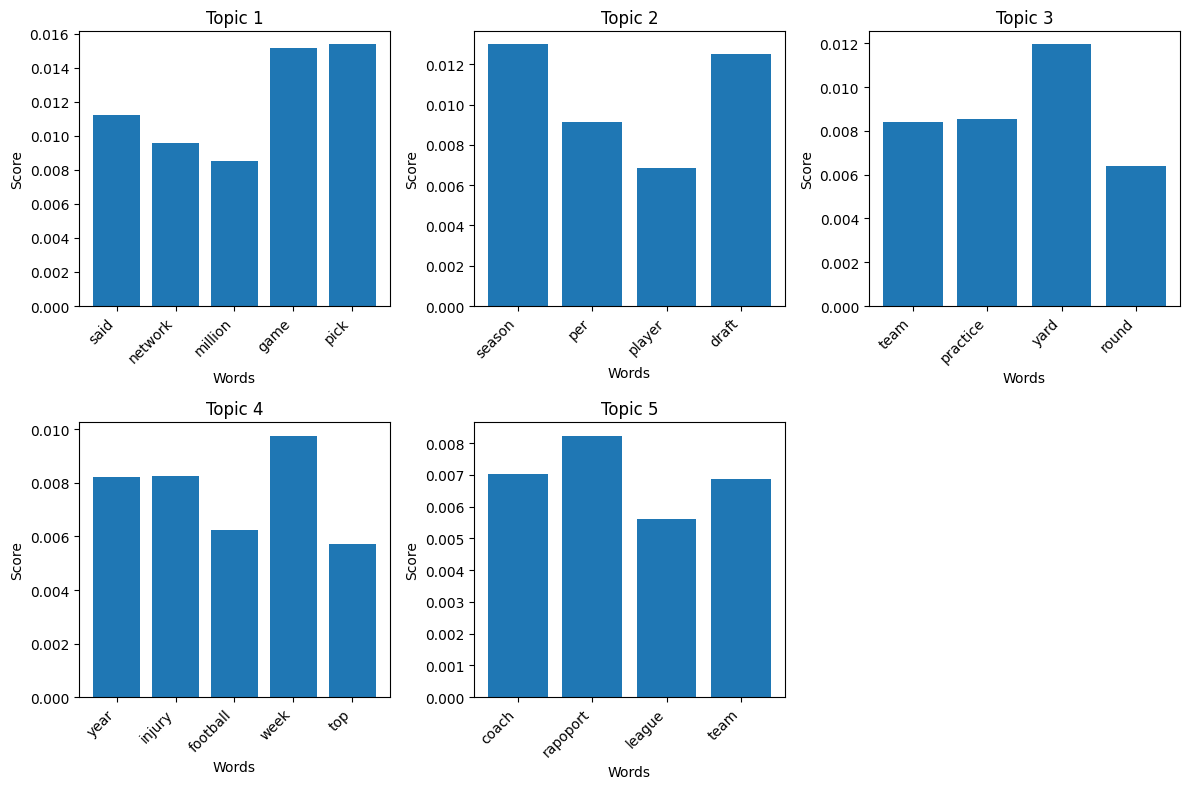

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the top N words with scores for each topic
num_words_per_topic = 10
top_words_with_scores_per_topic = []
for topic_id in range(num_topics):
    top_words = lda_model.show_topic(topic_id, topn=num_words_per_topic)
    top_words_with_scores = [(word, score) for word, score in top_words]
    top_words_with_scores_per_topic.append(top_words_with_scores)

# Create a DataFrame to store the top words with scores for each topic
df_top_words = pd.DataFrame(top_words_with_scores_per_topic, columns=[f'Top_{i+1}_Word' for i in range(num_words_per_topic)])

# Plot bar plots for each topic
plt.figure(figsize=(12, 8))
for i in range(num_topics):
    plt.subplot(2, 3, i+1)
    words = df_top_words[f'Top_{i+1}_Word'].apply(lambda x: x[0])  # Extract words from tuple
    scores = df_top_words[f'Top_{i+1}_Word'].apply(lambda x: x[1])  # Extract scores from tuple
    plt.bar(words, scores)
    plt.xlabel('Words')
    plt.ylabel('Score')
    plt.title(f'Topic {i+1}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:508:

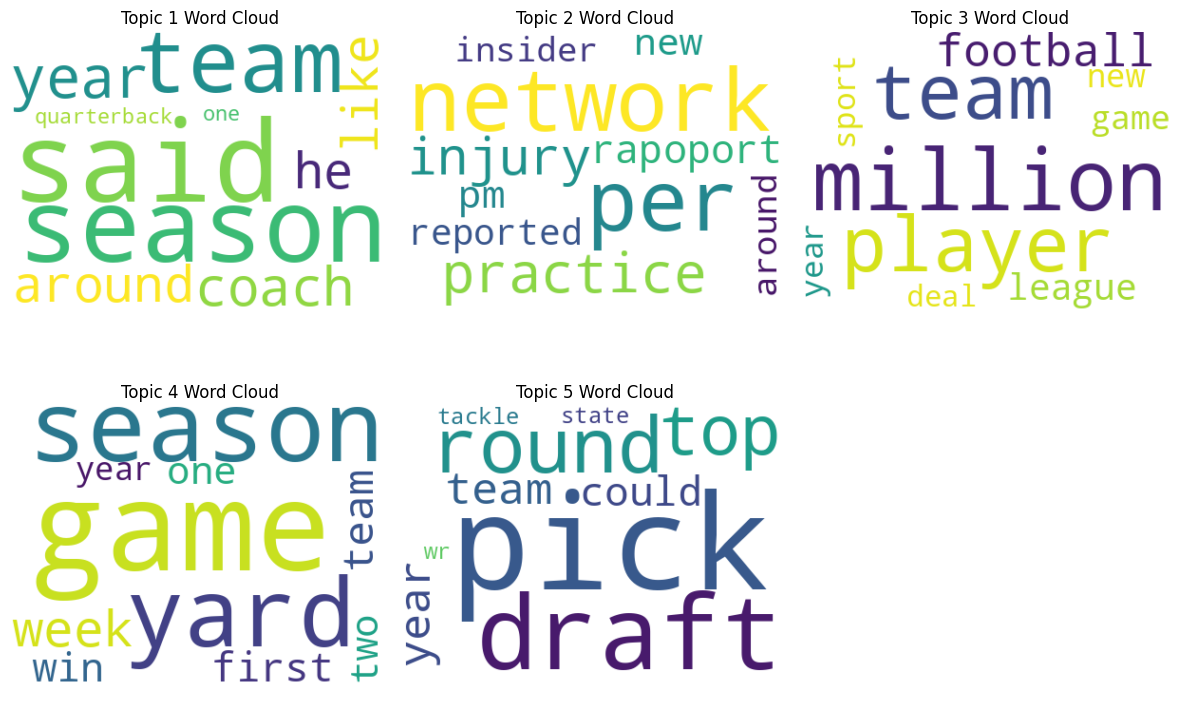

In [ ]:
from wordcloud import WordCloud

# Plot word clouds for each topic
plt.figure(figsize=(12, 8))
for i in range(num_topics):
    plt.subplot(2, 3, i+1)
    wordcloud = WordCloud(width=400, height=300, background_color='white').generate_from_frequencies(dict(top_words_with_scores_per_topic[i]))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {i+1} Word Cloud')
plt.tight_layout()
plt.show()


the above (please scroll down to see word cloud after the logs) outcome is a grid of subplots, each displaying a word cloud visualization representing the most relevant words for a given topic. The size of each word in the word cloud corresponds to its score, providing a visually intuitive way to understand the key terms associated with each topic from the topic modeling process.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


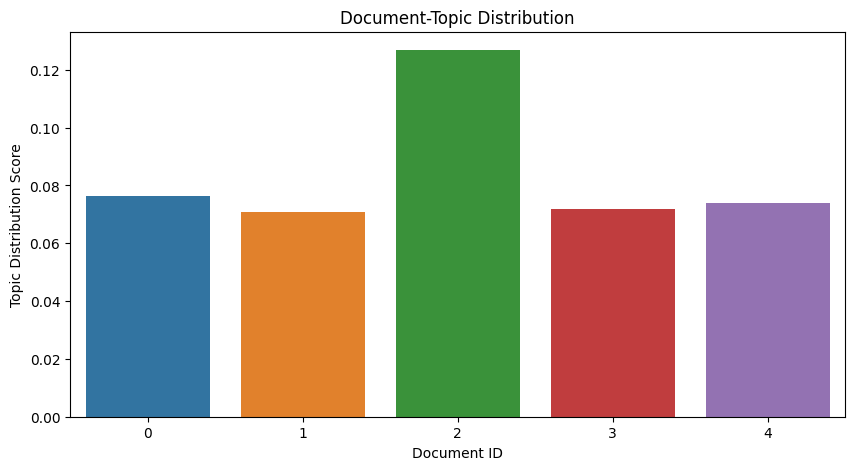

In [ ]:
# Get the document-topic distribution
doc_topic_distribution = df_top_words.apply(lambda x: x.map(lambda word_score: word_score[1])).sum(axis=1)

# Plot the document-topic distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=doc_topic_distribution.index, y=doc_topic_distribution.values)
plt.xlabel('Document ID')
plt.ylabel('Topic Distribution Score')
plt.title('Document-Topic Distribution')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


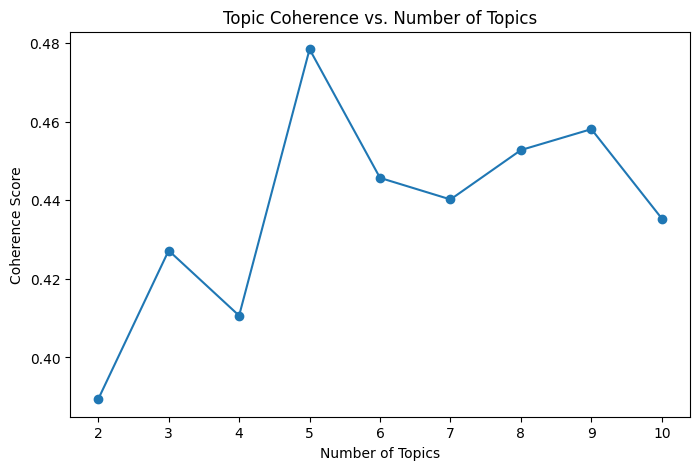

In [ ]:
from gensim.models import CoherenceModel

# Calculate coherence scores for different numbers of topics
coherence_scores = []
num_topics_list = [i for i in range(2, 11)]
for num_topics in num_topics_list:
    lda_model = LdaModel(corpus, id2word=dictionary, num_topics=num_topics, passes=10)
    coherence_model = CoherenceModel(model=lda_model, texts=df['Processed_Text'], dictionary=dictionary, coherence='c_v')
    coherence_scores.append(coherence_model.get_coherence())

# Plot the coherence scores
plt.figure(figsize=(8, 5))
plt.plot(num_topics_list, coherence_scores, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Topic Coherence vs. Number of Topics')
plt.show()
